In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fire = pd.read_csv("Fires.csv")
fire.head()

/afs/ir.stanford.edu/group/bil/env/j2/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,...,0.10,A,40.036944,-121.005833,5,USFS,CA,63,63.0,Plumas
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,0.25,A,38.933056,-120.404444,5,USFS,CA,61,61.0,Placer
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,0.10,A,38.984167,-120.735556,13,STATE OR PRIVATE,CA,17,17.0,El Dorado
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,0.10,A,38.559167,-119.913333,5,USFS,CA,3,3.0,Alpine
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,0.10,A,38.559167,-119.933056,5,USFS,CA,3,3.0,Alpine


In [3]:
colnames = fire.columns.values
print (colnames)

['OBJECTID' 'FOD_ID' 'FPA_ID' 'SOURCE_SYSTEM_TYPE' 'SOURCE_SYSTEM'
 'NWCG_REPORTING_AGENCY' 'NWCG_REPORTING_UNIT_ID'
 'NWCG_REPORTING_UNIT_NAME' 'SOURCE_REPORTING_UNIT'
 'SOURCE_REPORTING_UNIT_NAME' 'LOCAL_FIRE_REPORT_ID' 'LOCAL_INCIDENT_ID'
 'FIRE_CODE' 'FIRE_NAME' 'ICS_209_INCIDENT_NUMBER' 'ICS_209_NAME' 'MTBS_ID'
 'MTBS_FIRE_NAME' 'COMPLEX_NAME' 'FIRE_YEAR' 'DISCOVERY_DATE'
 'DISCOVERY_DOY' 'DISCOVERY_TIME' 'STAT_CAUSE_CODE' 'STAT_CAUSE_DESCR'
 'CONT_DATE' 'CONT_DOY' 'CONT_TIME' 'FIRE_SIZE' 'FIRE_SIZE_CLASS'
 'LATITUDE' 'LONGITUDE' 'OWNER_CODE' 'OWNER_DESCR' 'STATE' 'COUNTY'
 'FIPS_CODE' 'FIPS_NAME']


In [21]:
fire_relevant = fire[['FOD_ID', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'LATITUDE','LONGITUDE', 'STATE']];
print (fire_relevant.shape)

(1880465, 13)


In [22]:
fire_relevant.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,STATE
0,1,2005,2453403.5,33,1300.0,9,2453403.5,33.0,1730.0,0.10,40.036944,-121.005833,CA
1,2,2004,2453137.5,133,845.0,1,2453137.5,133.0,1530.0,0.25,38.933056,-120.404444,CA
2,3,2004,2453156.5,152,1921.0,5,2453156.5,152.0,2024.0,0.10,38.984167,-120.735556,CA
3,4,2004,2453184.5,180,1600.0,1,2453189.5,185.0,1400.0,0.10,38.559167,-119.913333,CA
4,5,2004,2453184.5,180,1600.0,1,2453189.5,185.0,1200.0,0.10,38.559167,-119.933056,CA


In [6]:
fire_relevant['FIRE_YEAR'].value_counts().sort_index()

1992     67975
1993     61989
1994     75955
1995     71472
1996     75574
1997     61450
1998     68370
1999     89363
2000     96416
2001     86587
2002     75656
2003     68261
2004     69279
2005     88604
2006    114004
2007     95573
2008     85378
2009     78325
2010     79889
2011     90552
2012     72769
2013     64780
2014     67753
2015     74491
Name: FIRE_YEAR, dtype: int64

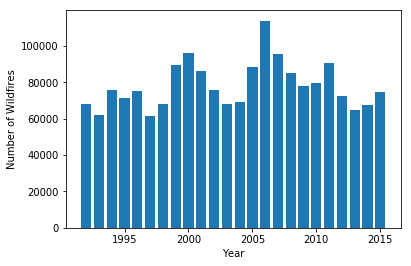

In [7]:
YEAR = fire_relevant['FIRE_YEAR'].value_counts().sort_index().keys().tolist()
YEAR_COUNT = fire_relevant['FIRE_YEAR'].value_counts().sort_index().tolist()
plt.bar(YEAR, YEAR_COUNT, align='center')
plt.xlabel('Year')
plt.ylabel('Number of Wildfires')
plt.show()

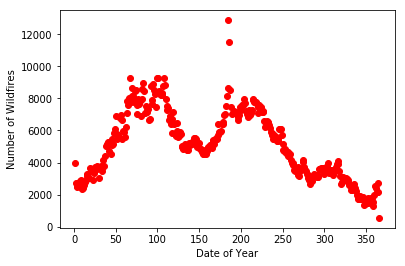

In [8]:
DOY = fire_relevant['DISCOVERY_DOY'].value_counts().sort_index().keys().tolist()
DOY_COUNT = fire_relevant['DISCOVERY_DOY'].value_counts().sort_index().tolist()
plt.plot(DOY, DOY_COUNT, 'ro')
plt.xlabel('Date of Year')
plt.ylabel('Number of Wildfires')
plt.show()

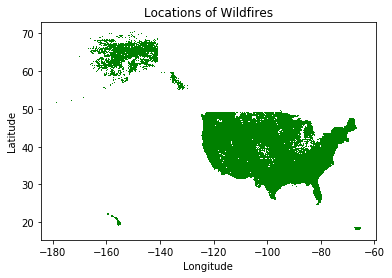

In [9]:
lati = fire_relevant['LATITUDE']
longi = fire_relevant['LONGITUDE']
plt.plot(longi, lati, 'g,')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations of Wildfires')
plt.show()

# lol, we should do a heat map instead, there're too many data points.

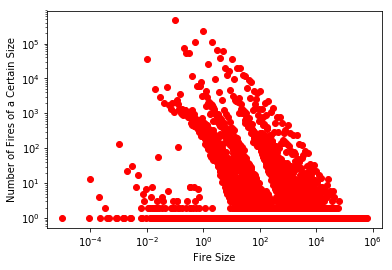

In [15]:
SIZE = fire_relevant['FIRE_SIZE'].value_counts().sort_index().keys().tolist()
SIZE_COUNT = fire_relevant['FIRE_SIZE'].value_counts().sort_index().tolist()
plt.plot(SIZE, SIZE_COUNT, 'ro')
plt.xscale('log');
plt.yscale('log');
plt.xlabel('Fire Size')
plt.ylabel('Number of Fires of a Certain Size')
plt.show()

In [23]:
# Change state names to numbers for matlab.
state_mapping = {
    'AL': 1,
    'AK': 2,
    'AZ': 3,
    'AR': 4,
    'CA': 5,
    'CO': 6,
    'CT': 7,
    'DE': 8,
    'FL': 9,
    'GA': 10,
    'HI': 11,
    'ID': 12,
    'IL': 13,
    'IN': 14,
    'IA': 15,
    'KS': 16,
    'KY': 17,
    'LA': 18,
    'ME': 19,
    'MD': 20,
    'MA': 21,
    'MI': 22,
    'MN': 23,
    'MS': 24,
    'MO': 25,
    'MT': 26,
    'NE': 27,
    'NV': 28,
    'NH': 29,
    'NJ': 30,
    'NM': 31,
    'NY': 32,
    'NC': 33,
    'ND': 34,
    'OH': 35,
    'OK': 36,
    'OR': 37,
    'PA': 38,
    'RI': 39,
    'SC': 40,
    'SD': 41,
    'TN': 42,
    'TX': 43,
    'UT': 44,
    'VT': 45,
    'VA': 46,
    'WA': 47,
    'WV': 48,
    'WI': 49,
    'WY': 50,
    'AS': 51,
    'DC': 52,
    'FM': 53,
    'GU': 54,
    'MH': 55,
    'MP': 56,
    'PW': 57,
    'PR': 58,
    'VI': 59,
    'AE': 60,
    'AA': 61,
    'AP': 62
}
fire_relevant['STATE'] = fire_relevant['STATE'].map(state_mapping)
fire_relevant.head()

/afs/ir.stanford.edu/group/bil/env/j2/lib/python3.5/site-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,STATE
0,1,2005,2453403.5,33,1300.0,9,2453403.5,33.0,1730.0,0.10,40.036944,-121.005833,5
1,2,2004,2453137.5,133,845.0,1,2453137.5,133.0,1530.0,0.25,38.933056,-120.404444,5
2,3,2004,2453156.5,152,1921.0,5,2453156.5,152.0,2024.0,0.10,38.984167,-120.735556,5
3,4,2004,2453184.5,180,1600.0,1,2453189.5,185.0,1400.0,0.10,38.559167,-119.913333,5
4,5,2004,2453184.5,180,1600.0,1,2453189.5,185.0,1200.0,0.10,38.559167,-119.933056,5


In [24]:
fire_relevant.to_csv('fire_relevant.csv', sep=',')